# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

#Load the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Explore the dataset

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


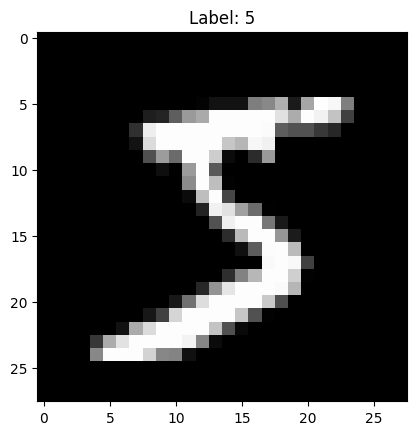

In [3]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

#  Preprocess the data

In [4]:
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

# Convert labels to one-hot encoding


In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Build the model


In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Flatten the 2D image to 1D
    Dense(128, activation='relu'),        # Hidden layer
    Dense(64, activation='relu'),         # Optional extra hidden layer
    Dense(10, activation='softmax')       # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model


In [12]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9888 - loss: 0.0341 - val_accuracy: 0.9758 - val_loss: 0.0946
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9780 - val_loss: 0.0857
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9795 - val_loss: 0.0912
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0211 - val_accuracy: 0.9778 - val_loss: 0.0982
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9740 - val_loss: 0.1282


# Evaluate the model


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1184

Test Accuracy: 0.9717


# Plot training history


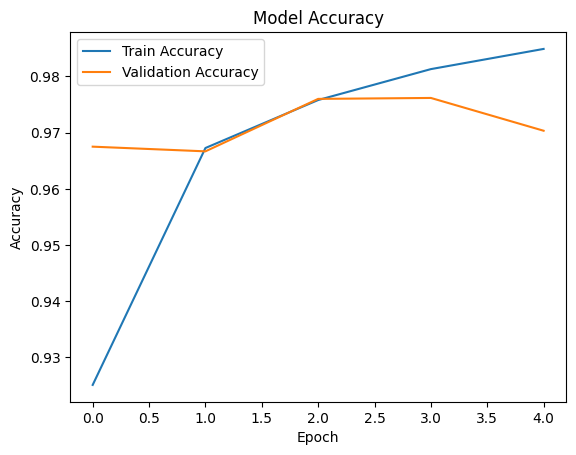

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Make predictions on test set


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


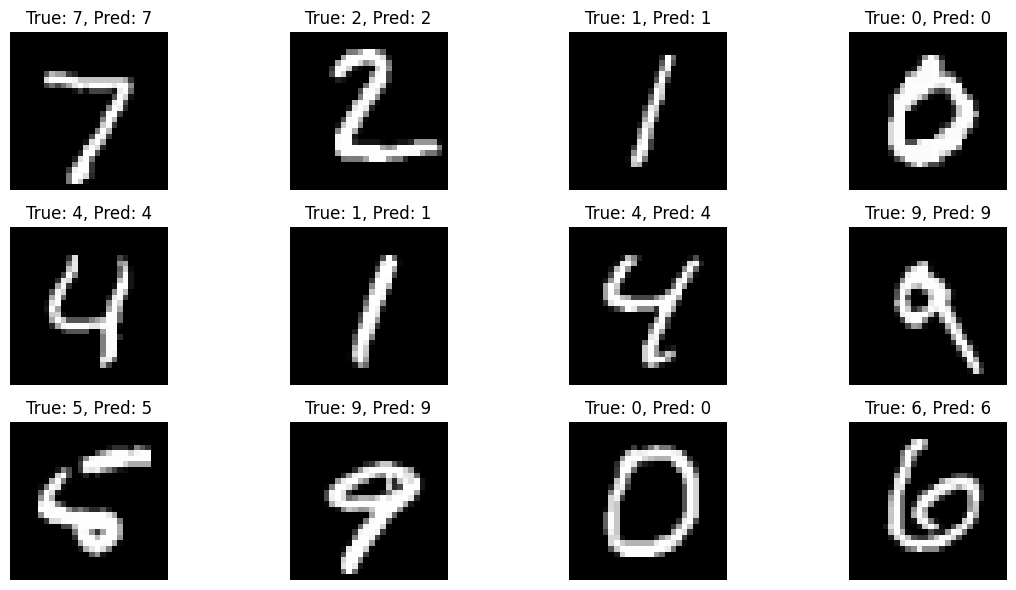

In [11]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Step 10: Plot a few test images with predictions
num_images = 12
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
